# Unit #5 Code


## Problem 1

#### (a) In a matrix $x$, generate 500 samples, each of size $n = 50$, from your favorite (non-normal) distribution.

Note! In any practical scenario, we would only have one sample of size $n$. The purpose here is the study the distribution of the sample mean, $\bar{x}$, over many (here, 500) samples. This is an extremely important concept. The distribution of the sample mean, as well as the distribution of other estimators, over many samples is heavily used in the statistical inference portion of the class.

In [27]:
x = matrix(ncol=50, nrow=500)

for (i in c(1:500)) {
    x[i,] = rpois(50, 4)
}

#### (b) Calculate the mean of each sample. This should be a vector of size 500. Call this vector ${\tt xbar}$.

${\tt xbar}$ represents having the mean of 500 different samples (again: in the real world, we'd only have one of these samples; but this allows us to think about the distribution of the estimator ${\tt xbar}$).


In [28]:
xbar = matrix(ncol=1, nrow=500)

for (i in c(1:500)) {
    xbar[i] = mean(x[i,])
}

#### (c) Construct a histogram of the means. Characterize the distribution of ${\tt xbar}$. What is the mean of ${\tt xbar}$? The variance of ${\tt xbar}$? 


[1] "This distribution appears as a normal distribution with a peak in the middle"

[1] "Mean: "

[1] 3.98272

[1] "Variance: "

0.06370722


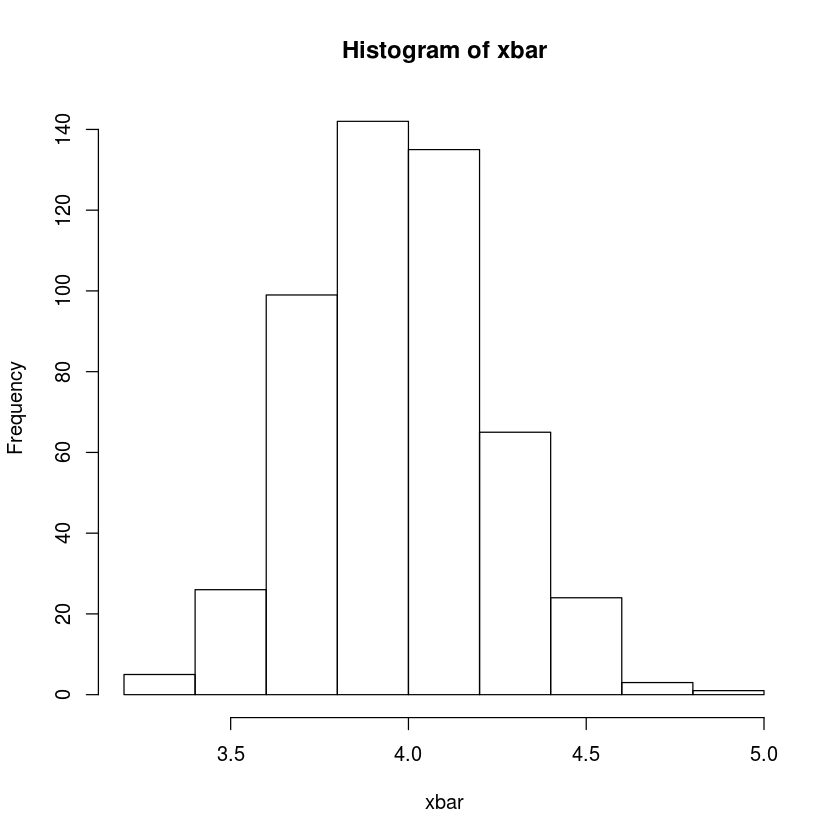

In [29]:
hist(xbar)
"This distribution appears as a normal distribution with a peak in the middle"
"Mean: " 
mean(xbar)
"Variance: " 
var(xbar)

#### (d) What is this an example of?

This is an example of the central limit theorem where the distribution of the average is normal

## Problem 2

Suppose that we are going to collect data containing information for 480 purchases at Monk's Cafe. Further, suppse we know two out of every three purchases at Monk's Cafe are paid for by credit cards.

#### (a) What is the probability that greater than 300 (of the 480) purchases will be made by credit card?

In [86]:
monks = matrix(nrow=10000, ncol=480)

for (i in c(1:10000)) {
    monks[i,] = rbinom(n=480, size=1, prob=0.66)
}

count = matrix(nrow=10000, ncol=1)

for (i in c(1:10000)) {
    count[i] = length(monks[i, monks[i,] == 1])
}

length(count[count[] >= 300])/length(count)


[1] 0.9493

#### (b) Now, consider $X \sim N(np, npq)$. Find the probability that $X$ is greater than 300. Compare this to the answer to part (b).


In [96]:
x = rnorm(n=10000, mean=320, sd=10)

length(x[x >= 300])/length(x)

"This answer is very similar to the answer in part (a), just a little bit higher"

[1] 0.976

[1] "This answer is very similar to the answer in part (a), just a little bit higher"

#### (c) Plot the pmf of the binomial random variable used in (a) and the pdf of X from part (b). Comment on the plots. 


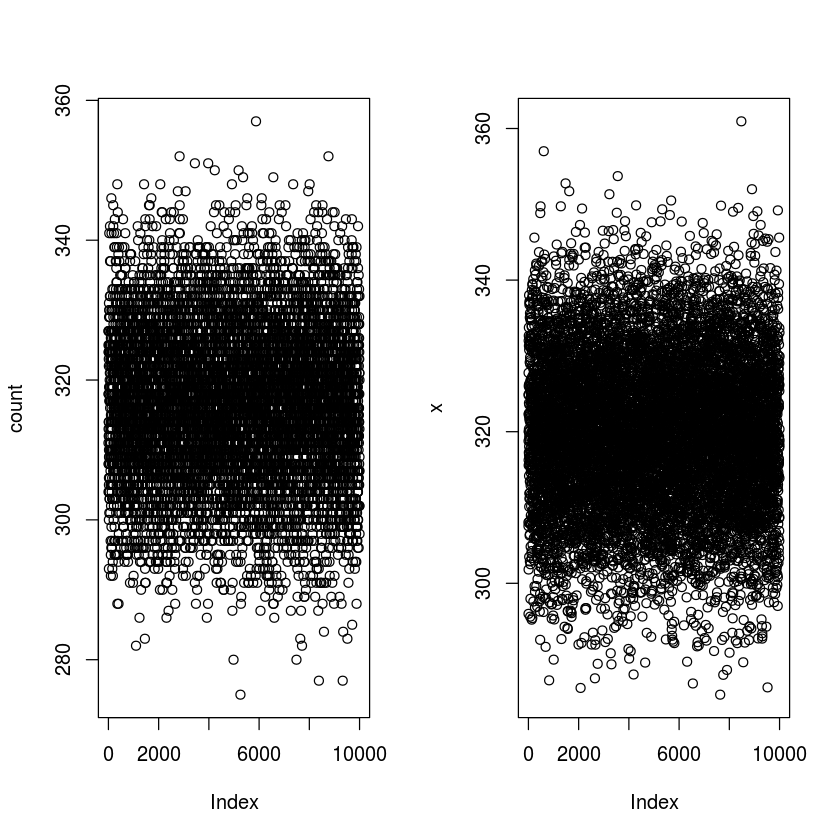

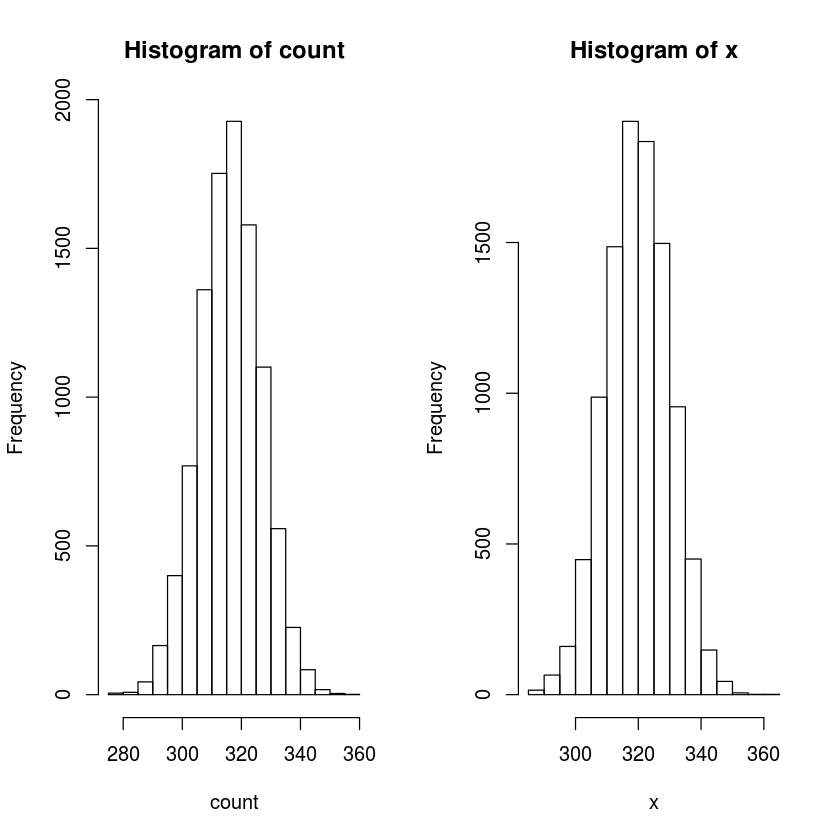

In [100]:
par(mfrow=c(1:2))
plot(count)
plot(x)
hist(count)
hist(x)

They both follow a normal distribution and are very similiar to each other

#### (d) Find the probability that between 220 to 320 will pay for their purchases using credit card. Use both the binomial distribution and the normal approximation given above.


In [105]:
length(x[x <= 320 & x >= 220])/length(x)
length(count[count <= 320 & count >= 220])/length(count)

[1] 0.5063

[1] 0.643

#### Make a mental note of these results! We will make use of them when we learn about confidence intervals for a population proportion.

## Problem 3

The amount of impurity in a batch of a chemical product is a random variable with mean value 4.0 g and standard deviation 1.5 g. The distribution of this random variable is unknown.

#### If 50 batches are independently prepared, what is the (approximate) probability that the average amount of impurity in these 50 batches is between 3.5 and 3.8 g?

In [114]:
batch = matrix(ncol=50, nrow=1000)
for (i in c(1:1000)) {
    batch[i,] = rnorm(n=50, mean=4, sd=1.5)
}

probs = matrix(ncol=1, nrow=1000)
for (i in c(1:1000)) {
    probs[i,] = length(batch[i, batch[i,] > 3.5 & batch[i,] < 3.8])/length(batch[i,])
}

sum(probs)/1000

[1] 0.07684

## Problem 4

Let $\widehat{\theta}$ be an estimator of the parameter $\theta$ (e.g., we might think of $\widehat{\theta} = \bar{x}$ and $\theta = \mu$, where $\mu$ is a population mean). We say that $\widehat{\theta}$ is *unbiased* if $E(\widehat{\theta}) = \theta$.

#### (a) Let $X_1,...,X_n \stackrel{iid}\sim \mathcal{P}(\lambda).$ Find an unbiased estimator for $\lambda$.


E(X) = lambda
so E(theta hat) = lambda
theta hat is an unbiased estimator of lambda when it is x bar

#### (b) Let $X_1,...,X_n \stackrel{iid}\sim Exp(\lambda).$ Find an unbiased estimator for $\lambda$.



E(X) for Exp(lambda) = 1/lambda
if lambda hat = 1/ x bar
E(x bar) = 1/(1/lambda) = lambda

#### (c) Let $X_1,...,X_n$ be an iid sample from a population with mean $\mu$ and variance $\sigma^2$.  Show that $ s^2 = \frac{1}{n-1}\sum^n_{i=1}(X_i - \bar{X})^2$ is an unbiased estimator of $\sigma^2$. This answers the question of why we divide by $n-1$ in $s^2$!



E(s^2) = E((summation(Xi - Xbar)^2)/(n-1)) = sigma^2

E(Xbar^2) = sigma^2 /n + Mu^2

= summation( E(Xi^2) - E(n*Xbar^2) )

E(Xi^2) = sigma^2 + Mu^2
E(Xbar^2) = sigma^2 /n + Mu^2

= n*sigma^2 + n*Mu^2 - sigma^2 - n*Mu^2
= (n-1) * sigma^2

= (1/(n-1)) * ((n-1) * sigma^2 )
= sigma^2


#### (d)  Assume that $E(\sqrt{X}) < \sqrt{E(X)}$. Show that $s$ is a *biased* estimator of $\sigma$.

#### (e) Use simulations to provide some evidence that $s$ is biased. Specifically:

1. Generate 500 different samples of size $n = 5$ from $Exp(1)$.
2. Calculate $s$ for each sample.
3. What is the mean of the distribution of $s$? 
4. Creat a histogram of the distribution of $s$. Comment on the distribution. How does this provide evidence that $s$ is biased?


[1] 1.035699

[1] "This provides evidence that s is biased because when 1/xbar = rate (1/1 = 1)"

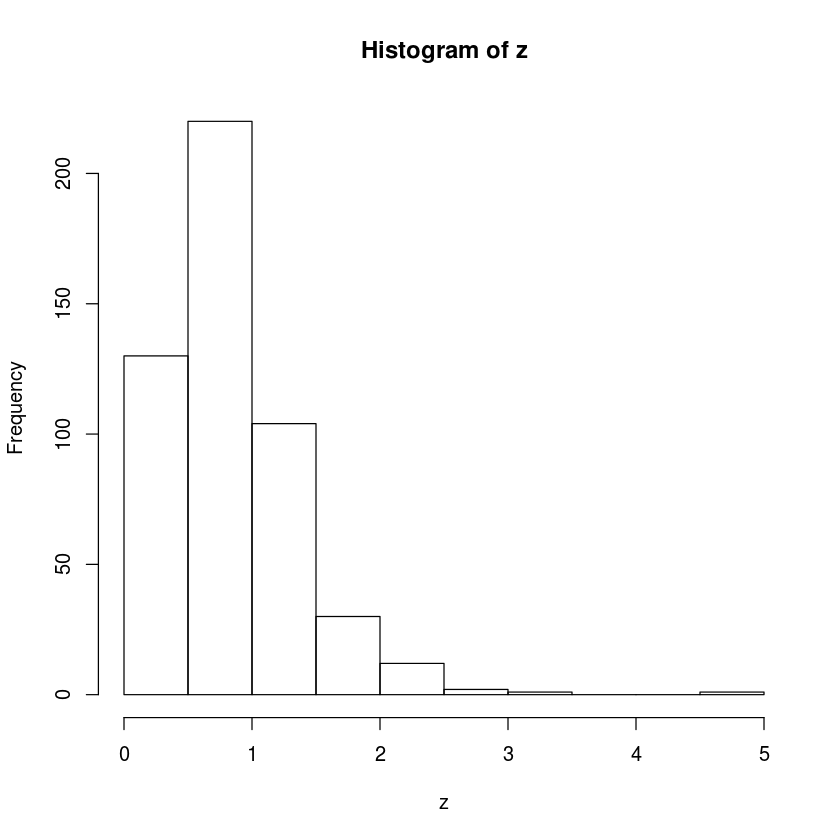

In [51]:
y = matrix(ncol=5, nrow=500)

for (i in c(1:500)) {
    y[i,] = rexp(n=5, rate=1)
}

z = matrix(ncol=1, nrow=500)

for (i in c(1:500)) {
    z[i] = sd(y[i,])
}

1/mean(y)
hist(z)
"This provides evidence that s is biased because when 1/xbar = rate (1/1 = 1)"

#### (f) Repeat the process described in (e) for $s^2$. What do you notice?

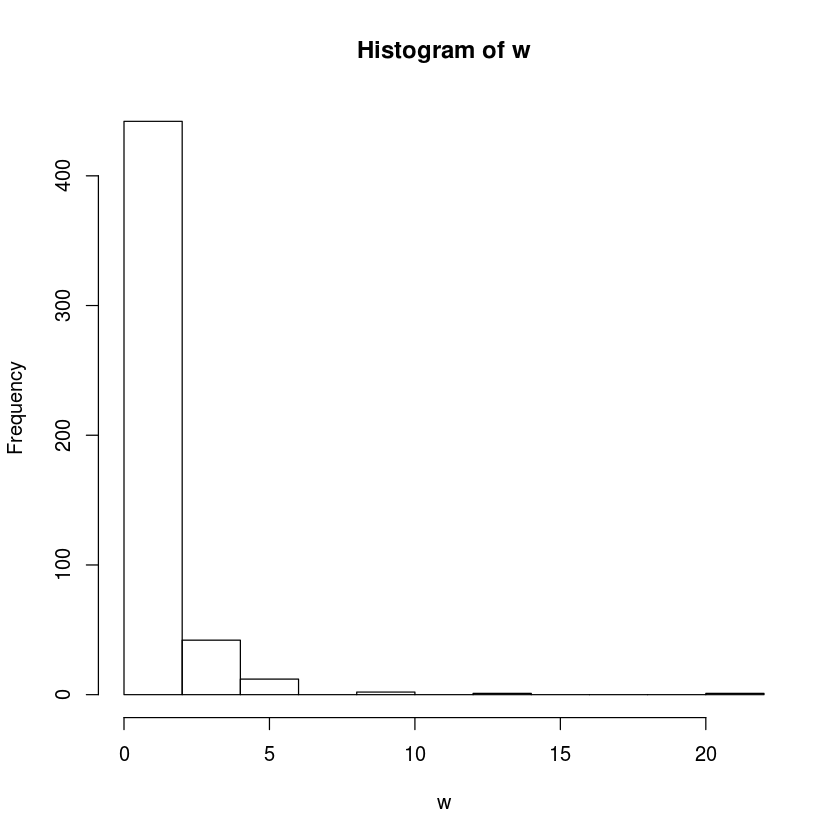

In [54]:
w = matrix(ncol=1, nrow=500)

for (i in c(1:500)) {
    w[i] = var(y[i,])
}

hist(w)